In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
n_train = mnist.train.num_examples
n_val = mnist.validation.num_examples
n_test = mnist.test.num_examples

In [5]:
print('Training Examples {}'.format(n_train))
print('Validation Examples {}'.format(n_val))
print('Testing Examples {}'.format(n_test))

Training Examples 55000
Validation Examples 5000
Testing Examples 10000


In [6]:
n_input = 784
n_hidden1 = 1000
n_hidden2 = 1000
n_hidden3 = 500
n_hidden4 = 200
n_output = 10
learning_rate=0.01
n_epochs=50
display_step=1

## Making out Tensorflow Model 

In [7]:
with tf.variable_scope('input'):
    X = tf.placeholder( dtype=tf.float32, shape=[None, n_input] )

In [8]:
with tf.variable_scope('layer_1'):
    weights_1 = tf.Variable( tf.random_normal( shape= [n_input, n_hidden1] ), name = 'weights_1' )
    biases_1 = tf.Variable( tf.zeros( shape= [n_hidden1] ), name = 'biases_1' )
    layer_1_output = tf.matmul( X, weights_1 ) + biases_1
    layer_1_output = tf.nn.relu( layer_1_output)

In [9]:
with tf.variable_scope('layer_2'):
    weights_2 = tf.Variable( tf.random_normal( shape= [n_hidden1,n_hidden2] ), name = 'weights_2' )
    biases_2 = tf.Variable( tf.zeros( shape= [n_hidden2] ), name = 'biases_2' )
    layer_2_output = tf.matmul( layer_1_output, weights_2 ) + biases_2
    layer_2_output = tf.nn.relu( layer_2_output )

In [10]:
with tf.variable_scope('layer_3'):
    weights_3 = tf.Variable( tf.random_normal( shape= [n_hidden2,n_hidden3] ), name = 'weights_3' )
    biases_3 = tf.Variable( tf.zeros( shape= [n_hidden3] ), name = 'biases_3' )
    layer_3_output = tf.matmul( layer_2_output, weights_3 ) + biases_3
    layer_3_output = tf.nn.relu( layer_3_output )

In [11]:
with tf.variable_scope('layer_4'):
    weights_4 = tf.Variable( tf.random_normal( shape= [n_hidden3,n_hidden4] ), name = 'weights_4' )
    biases_4 = tf.Variable( tf.zeros( shape= [n_hidden4] ), name = 'biases_4' )
    layer_4_output = tf.matmul( layer_3_output, weights_4 ) + biases_4
    layer_4_output = tf.nn.relu( layer_4_output )

In [12]:
with tf.variable_scope('output'):
    weights_out = tf.Variable( tf.random_normal( shape= [n_hidden4, n_output] ), name = 'weights_5' )
    biases_out = tf.Variable( tf.zeros( shape= [n_output] ), name = 'biases_5' )
    output = tf.matmul( layer_4_output, weights_out ) + biases_out

In [13]:
with tf.variable_scope('cost'):
    Y = tf.placeholder( shape=[None, n_output], dtype=tf.float32 )
    cost = tf.nn.softmax_cross_entropy_with_logits_v2( logits=output, labels=Y )
    cost = tf.reduce_mean(cost)

In [14]:
with tf.variable_scope('train'):
    opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [15]:
train_writer = tf.summary.FileWriter('./logs/training')
train_writer.add_graph( tf.get_default_graph() )

with tf.variable_scope('logging'):
    summary = tf.summary.scalar( 'cost', cost )

In [16]:
with tf.variable_scope('correct_pred'):
    correct_pred = tf.equal(tf.argmax(output, 1), tf.argmax(Y, 1))
with tf.variable_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(correct_pred,dtype=tf.float32))

In [33]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, './weights/epoch_0'  + '.ckpt')


## Training and Saving the Weights

In [34]:

with tf.Session() as sess:
    sess.run( tf.global_variables_initializer() )

    last_ckpt = tf.train.latest_checkpoint('./weights')
    saver.restore( sess, last_ckpt )

    for epoch in range(n_epochs):

        for _ in range(100):

            batch = mnist.train.next_batch(32)

            sess.run( opt, feed_dict= {
                X: batch[0],
                Y: batch[1]
            } )

        batch = mnist.train.next_batch(256)
        training_loss, train_summary,current_accuracy = sess.run( [cost, summary,accuracy] , feed_dict={
            X: batch[0],
            Y: batch[1]
        } )
        train_summary

        train_writer.add_summary( train_summary, epoch )


        test_loss = 0.0
        for _ in range(50):
            batch = mnist.test.next_batch(32)
            test_loss += sess.run( cost, feed_dict={
                X: batch[0],
                Y: batch[1]
            } )

        test_loss = test_loss/50

        if ( epoch + 1 ) % display_step == 0:
            print ( 'Training Loss is ' + str(training_loss) + ' Testing loss is ' + str(test_loss) + '\n')
            saver.save(sess, './weights/epoch_' + str(epoch + 1) + '.ckpt')
            print (" Model Saved \n ")
            print (" ----------- \n")



INFO:tensorflow:Restoring parameters from ./weights/epoch_0.ckpt
Training Loss is 32889.336 Testing loss is 25355.732978515625

 Model Saved 
 
 ----------- 

Training Loss is 13579.918 Testing loss is 14576.800595703126

 Model Saved 
 
 ----------- 

Training Loss is 20803.3 Testing loss is 14558.492817382812

 Model Saved 
 
 ----------- 

Training Loss is 6031.765 Testing loss is 7185.537001953125

 Model Saved 
 
 ----------- 

Training Loss is 4619.4946 Testing loss is 4460.27775390625

 Model Saved 
 
 ----------- 

Training Loss is 2988.7607 Testing loss is 1711.3239086914064

 Model Saved 
 
 ----------- 

Training Loss is 1380.1987 Testing loss is 2093.4927381578086

 Model Saved 
 
 ----------- 

Training Loss is 223.38118 Testing loss is 260.2669305956364

 Model Saved 
 
 ----------- 

Training Loss is 15.059736 Testing loss is 29.328798036575318

 Model Saved 
 
 ----------- 

Training Loss is 19.996122 Testing loss is 4.6681018686294555

 Model Saved 
 
 ----------- 

Tr

## Visualization of the trained weights

INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt


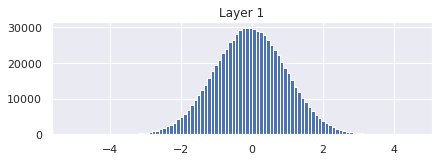

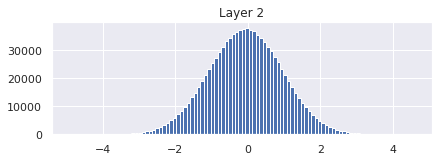

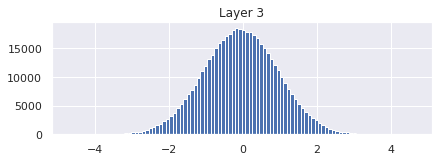

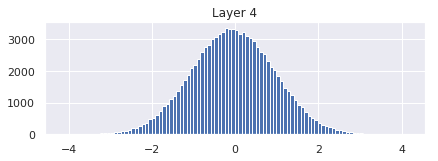

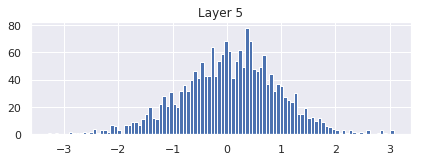

In [19]:
sns.set()

with tf.Session() as sess:
    last_ckpt = tf.train.latest_checkpoint('./weights')
    saver.restore(sess,last_ckpt)
    weight_arr = [weights_1,weights_2,weights_3,weights_4,weights_out]
    duplicate_weights = []
    for i in range(1,6):
        
        weights = weight_arr[i-1].eval()
        tmp_weights = weights
        duplicate_weights.append(tf.convert_to_tensor(tmp_weights))
        f = plt.figure(figsize=(15,7))
        plt.subplot(3,2,i)
        plt.title("Layer {}".format(i))
        plt.hist(weights.reshape(-1),bins=100)

In [20]:
with tf.Session() as sess:
    print(duplicate_weights[1].eval())

[[ 0.5072078   0.21283905 -0.87777734 ... -1.6761979  -1.2019978
   2.2198741 ]
 [ 1.1234964   0.679135    0.24195346 ... -0.7110732   1.6973166
  -0.42353657]
 [ 2.0025654   0.12094975  0.11841393 ... -1.1754714  -0.12571888
   1.3730735 ]
 ...
 [ 0.6163077  -0.18290783 -0.57528865 ... -1.0739796   1.6370796
  -0.5156732 ]
 [-0.117119   -0.8029234  -1.6642269  ... -1.4793433   0.01394048
  -0.6184063 ]
 [ 2.0891068   1.1905332  -0.25904366 ...  0.11109718  0.25558814
  -3.1762314 ]]


## Pruning

k_percent_arr = [0, 25, 50, 60, 70, 80, 90, 95, 97, 99]

## Weight Pruning

In [21]:
k_percent_arr = [0, 25, 50, 60, 70, 80, 90, 95, 97, 99]

In [22]:
def prune_weights(k_percent):
    weight_arr = [weights_1,weights_2,weights_3,weights_4,weights_out]
    new_weights = []
    num_layers = 5
    for i,weights in enumerate(weight_arr):
        layer_weights = weights.eval()
        if i < num_layers-1:
            threshold = np.percentile(np.abs(layer_weights), k_percent)
            zero_mask = np.abs(layer_weights) < threshold
            layer_weights[zero_mask] = 0
        new_weights.append(tf.convert_to_tensor(layer_weights))
    return new_weights


In [23]:
weight_pruning_loss=[]
weight_pruning_accuracy=[]
weight_pruning_time=[]

def run_weight_pruning():
    with tf.Session() as sess:
        last_ckpt = tf.train.latest_checkpoint('./weights')
        saver.restore(sess,last_ckpt)
        for i,k in enumerate(k_percent_arr):
            
            new_weights = prune_weights(k)
            print(k)
            weights_1.load(new_weights[0].eval())
            weights_2.load(new_weights[1].eval())
            weights_3.load(new_weights[2].eval())
            weights_4.load(new_weights[3].eval())
            weights_out.load(new_weights[4].eval())
            batch = mnist.train.next_batch(256)
            start = time.clock()
            temp_loss=0
            for _ in range(50):
                batch = mnist.test.next_batch(32)
                loss,current_accuracy = sess.run( [cost,accuracy], feed_dict={X: batch[0],Y: batch[1] } )
                temp_loss+=loss    
            end = time.clock() - start
            print("Pruning Percent {}".format(k)+'   Loss {}'.format(temp_loss)+'   Accuracy {}'.format(current_accuracy))
            weight_pruning_loss.append(loss)
            weight_pruning_accuracy.append(current_accuracy)
            weight_pruning_time.append(end)
                
    weight_pruning_metrics={'Loss':weight_pruning_loss,'Accuracy':weight_pruning_accuracy,'Time':weight_pruning_time}
    return weight_pruning_metrics
            
            
            

## Lets see the changes in Accuracies and Loss with respect to percent sparcity  

In [24]:
metrics = run_weight_pruning()

INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
0
Pruning Percent 0   Loss 189.2660894393921   Accuracy 0.21875
25
Pruning Percent 25   Loss 132.75210571289062   Accuracy 0.21875
50
Pruning Percent 50   Loss 24956.80966949463   Accuracy 0.25
60
Pruning Percent 60   Loss 118661.55554199219   Accuracy 0.28125
70
Pruning Percent 70   Loss 155522.5390625   Accuracy 0.3125
80
Pruning Percent 80   Loss 299859.771484375   Accuracy 0.3125
90
Pruning Percent 90   Loss 499563.2333984375   Accuracy 0.15625
95
Pruning Percent 95   Loss 337976.6101074219   Accuracy 0.0625
97
Pruning Percent 97   Loss 307603.640625   Accuracy 0.0625
99
Pruning Percent 99   Loss 112072.50024414062   Accuracy 0.03125


Text(0, 0.5, 'Time Consumed')

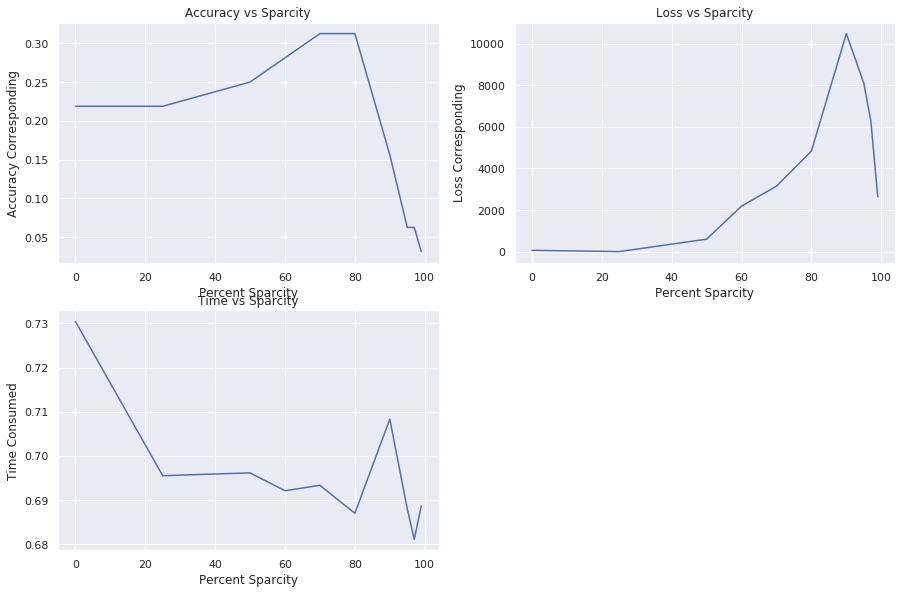

In [40]:
f = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title("Accuracy vs Sparcity")
plt.plot(k_percent_arr,metrics['Accuracy'])
plt.xlabel('Percent Sparcity')
plt.ylabel('Accuracy Corresponding')

plt.subplot(3,2,2)
plt.title("Loss vs Sparcity")
plt.plot(k_percent_arr,metrics['Loss'])
plt.xlabel('Percent Sparcity')
plt.ylabel('Loss Corresponding')

plt.subplot(3,2,3)
plt.title("Time vs Sparcity")
plt.plot(k_percent_arr,metrics['Time'])
plt.xlabel('Percent Sparcity')
plt.ylabel('Time Consumed')

In [26]:
def weights_after_pruning():
    with tf.Session() as sess:
        last_ckpt = tf.train.latest_checkpoint('./weights')
        saver.restore(sess,last_ckpt)
        for i,k in enumerate(k_percent_arr):
            new_weights = prune_weights(k)
#             print('<<-------------Percent Sparcity : {}'.format(k)+'-------------->>')
            for i in range(1,6):
        
                weights = new_weights[i-1].eval()
                f = plt.figure(figsize=(15,7))
                plt.subplot(3,2,i)
                plt.title("Layer {}".format(i))
                plt.hist(weights.reshape(-1),bins=100)
        

## Visualization of Weights after Each Pruning Step

INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 0-------------->>
<<-------------Percent Sparcity : 25-------------->>
<<-------------Percent Sparcity : 50-------------->>
<<-------------Percent Sparcity : 60-------------->>
<<-------------Percent Sparcity : 70-------------->>


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<<-------------Percent Sparcity : 80-------------->>
<<-------------Percent Sparcity : 90-------------->>
<<-------------Percent Sparcity : 95-------------->>
<<-------------Percent Sparcity : 97-------------->>
<<-------------Percent Sparcity : 99-------------->>


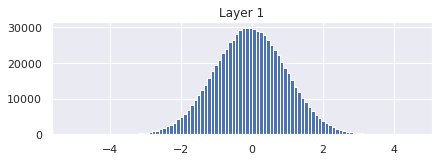

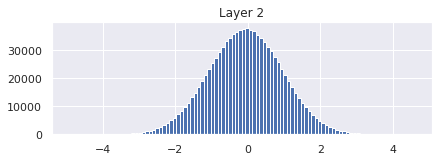

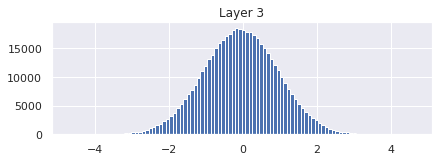

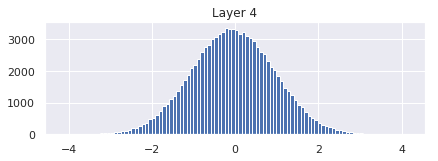

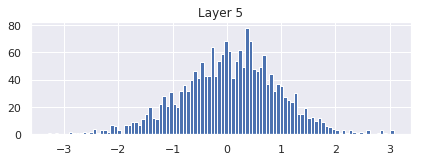

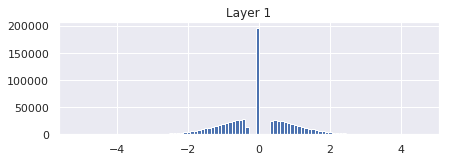

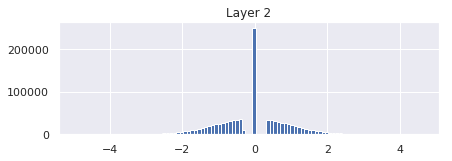

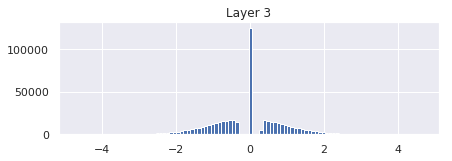

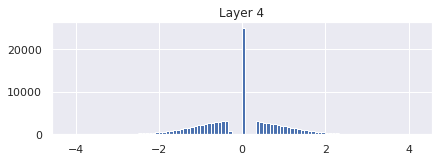

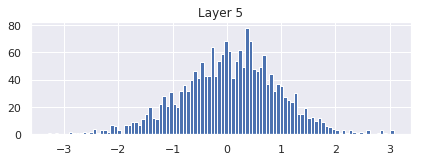

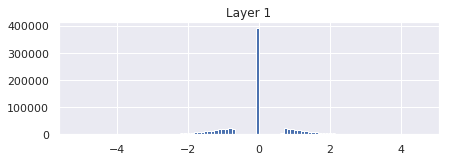

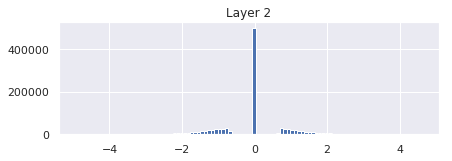

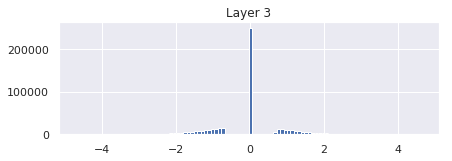

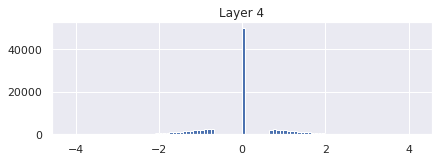

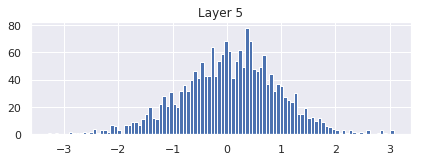

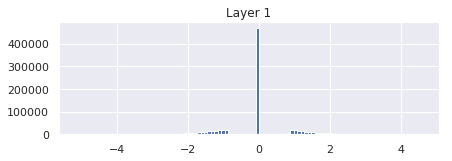

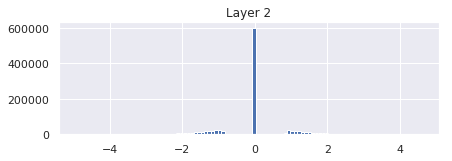

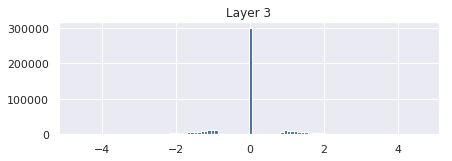

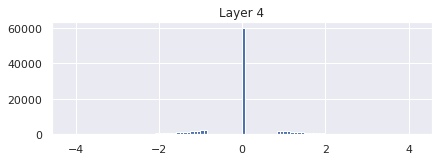

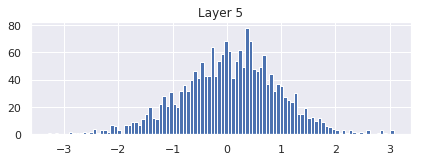

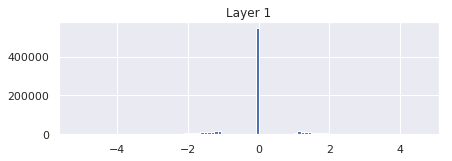

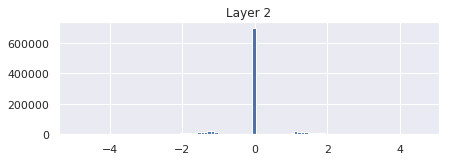

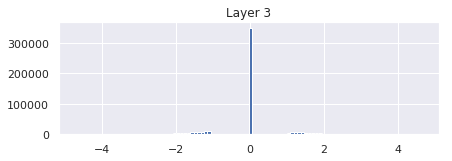

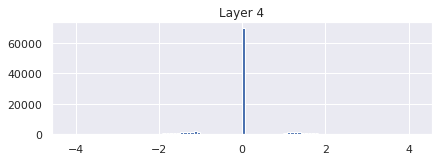

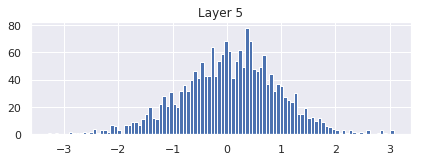

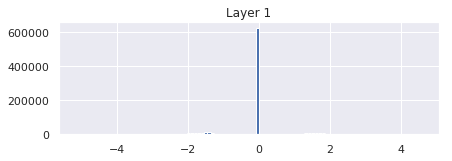

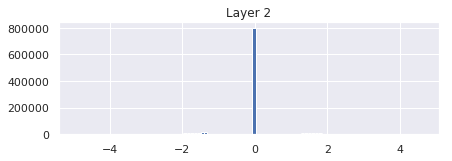

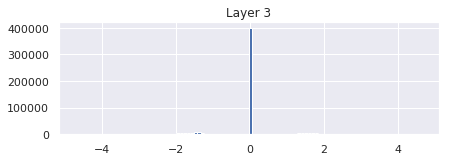

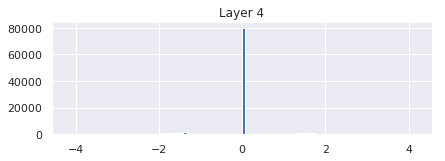

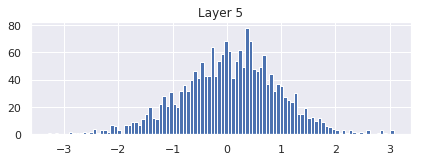

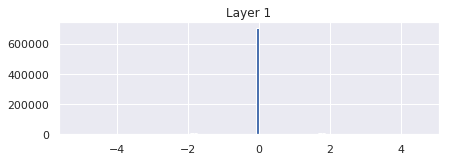

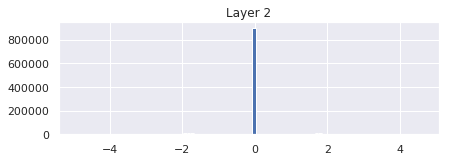

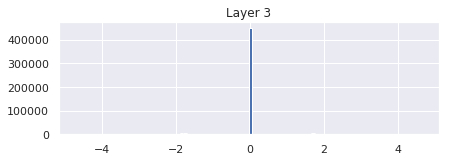

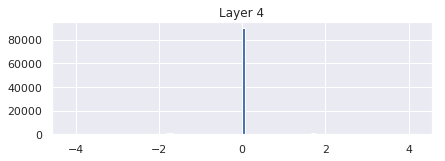

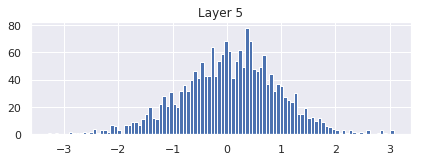

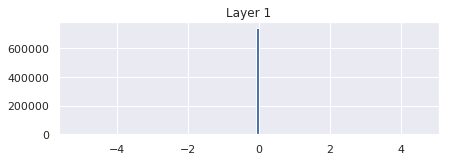

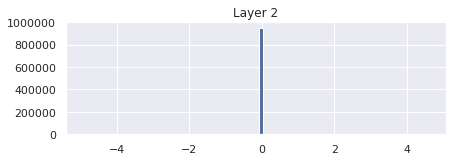

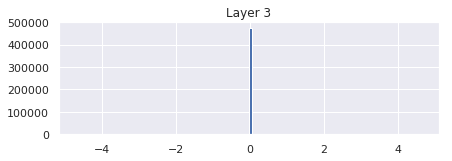

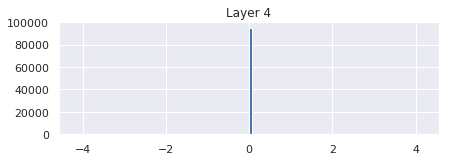

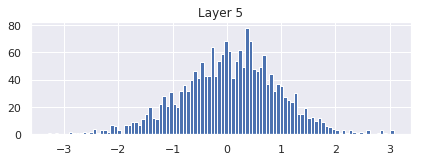

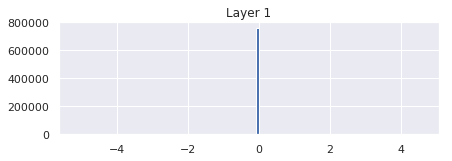

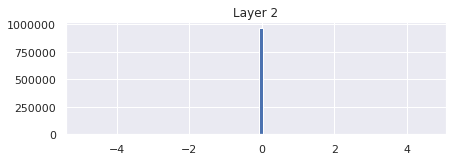

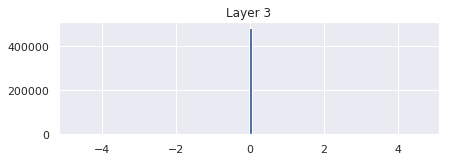

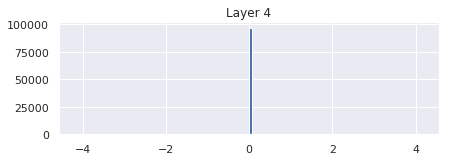

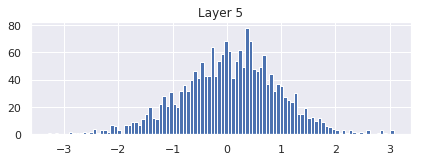

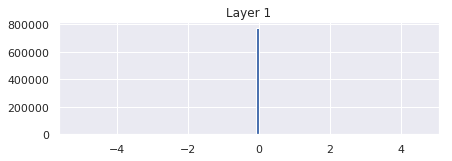

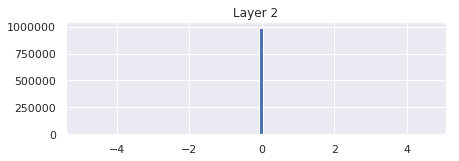

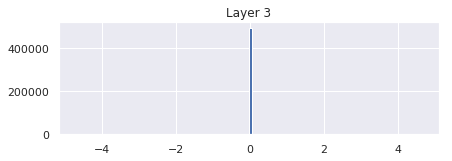

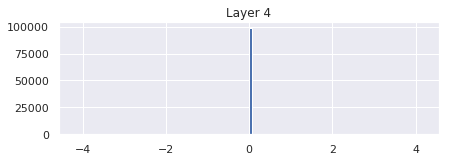

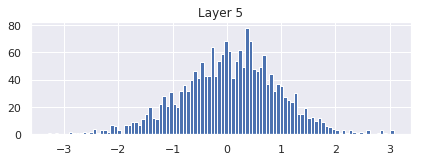

In [27]:
weights_after_pruning()

## Weights pruning is been done properly as intended and as we can see above where we plotted the accuracies and loss we pruning does not affect until 80-70% but after that we can see its effects on our metrics

k_percent_arr = [0, 25, 50, 60, 70, 80, 90, 95, 97, 99]

## Unit Pruning

In [28]:
def unit_pruning(k_percent):
    with tf.Session() as sess:
        last_ckpt = tf.train.latest_checkpoint('./weights')
        saver.restore(sess,last_ckpt)
        weight_arr = [weights_1,weights_2,weights_3,weights_4,weights_out]
        new_weights = []
        num_layers=5
        prev_kept_columns = None
        for i_layer, weights in enumerate(weight_arr):
            weights_np = weights.eval()
        
            if i_layer < num_layers-1:
                column_norms = np.linalg.norm(weights_np, ord=2, axis=0)
                critical_value = np.percentile(column_norms, k_percent)
                keep_mask = column_norms >= critical_value
                weights_np = weights_np[:, keep_mask]
            
            if prev_kept_columns is not None:
                weights_np = weights_np[prev_kept_columns, :]
        
            if i_layer < num_layers-1: 
                prev_kept_columns = np.argwhere(keep_mask).reshape(-1)
            
            new_weights.append(tf.convert_to_tensor(weights_np))

    return new_weights

INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt


In [30]:
def weights_after_unit_pruning():
    with tf.Session() as sess:
        last_ckpt = tf.train.latest_checkpoint('./weights')
        saver.restore(sess,last_ckpt)
        for i,k in enumerate(k_percent_arr):
            new_weights = unit_pruning(k)
            print('<<-------------Percent Sparcity : {}'.format(k)+'-------------->>')
            for i in range(1,6):
        
                weights = new_weights[i-1].eval()
                f = plt.figure(figsize=(15,7))
                plt.subplot(3,2,i)
                plt.title("Layer {}".format(i))
                plt.hist(weights.reshape(-1),bins=100)
        

INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 0-------------->>
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 25-------------->>
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 50-------------->>
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 60-------------->>
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 70-------------->>


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 80-------------->>
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 90-------------->>
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 95-------------->>
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 97-------------->>
INFO:tensorflow:Restoring parameters from ./weights/epoch_50.ckpt
<<-------------Percent Sparcity : 99-------------->>


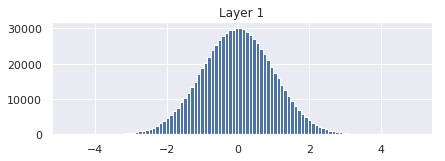

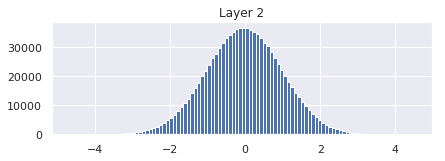

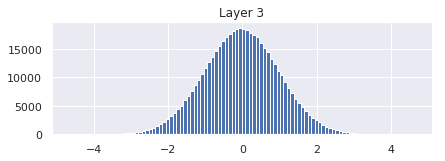

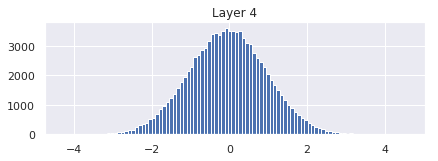

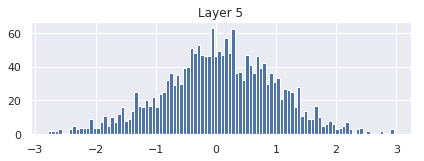

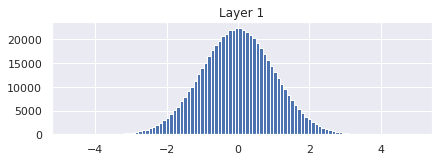

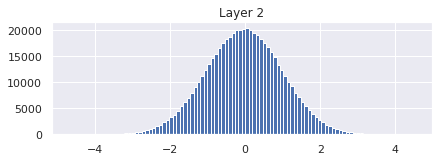

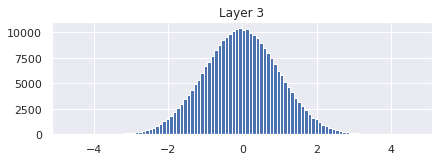

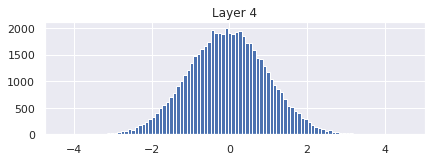

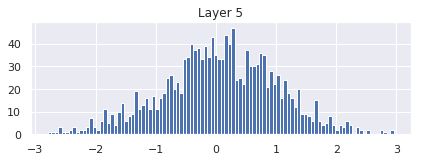

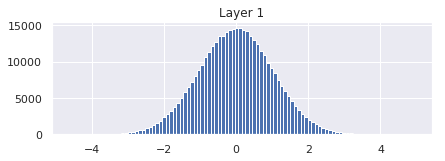

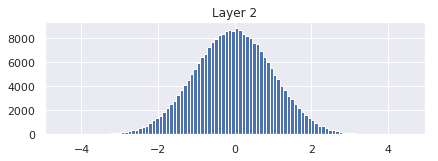

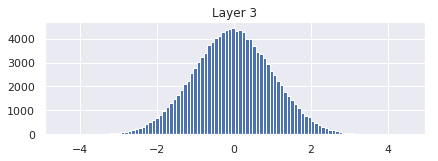

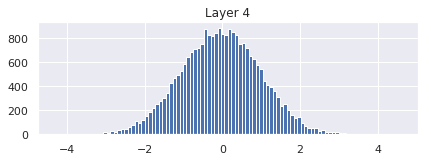

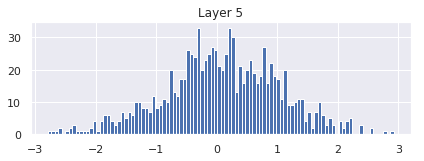

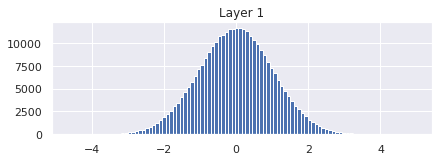

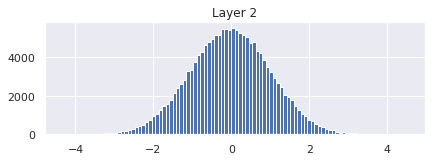

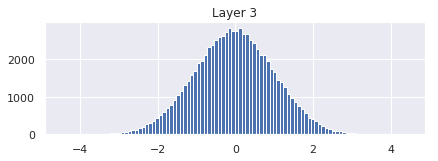

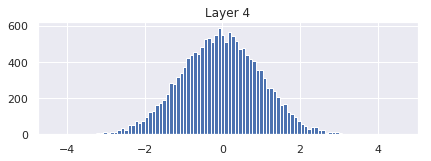

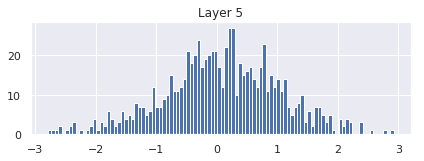

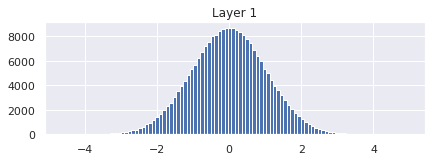

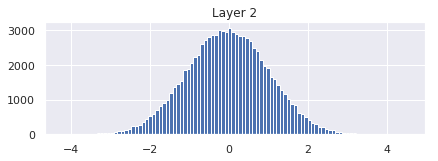

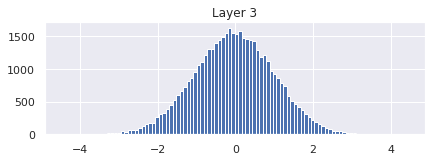

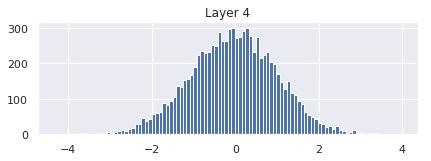

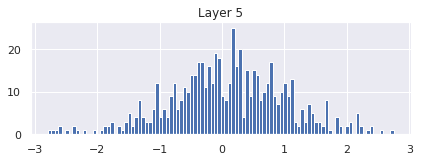

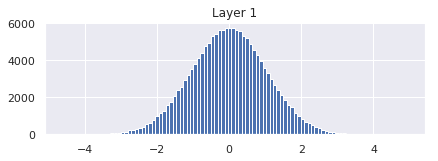

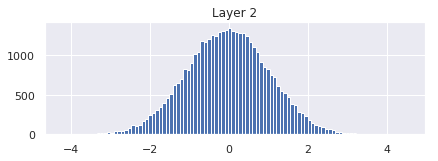

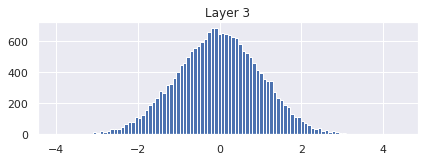

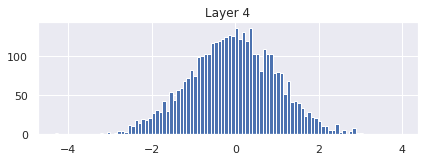

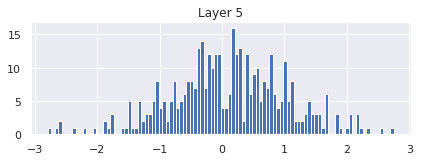

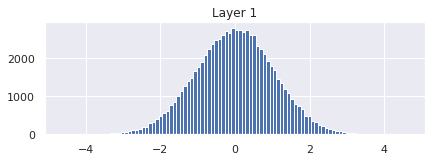

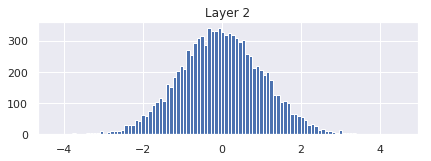

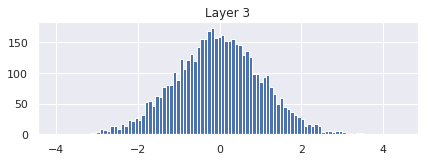

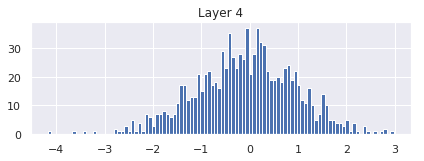

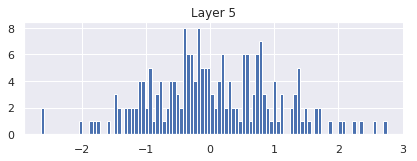

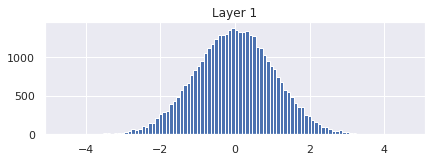

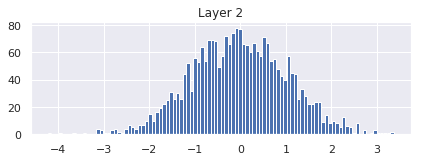

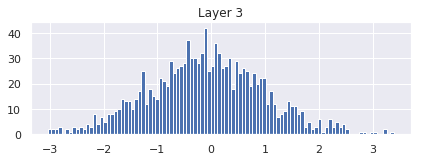

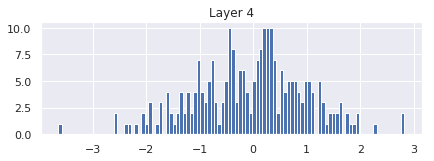

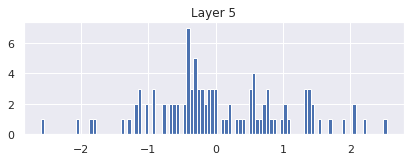

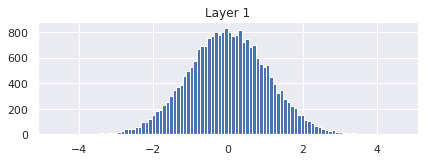

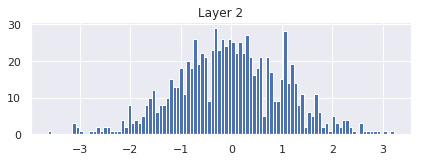

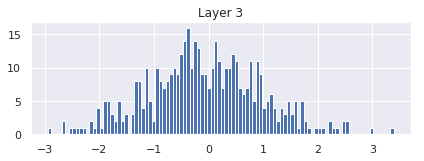

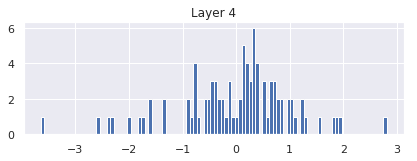

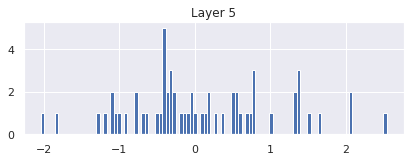

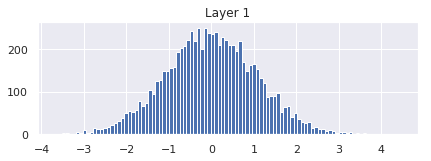

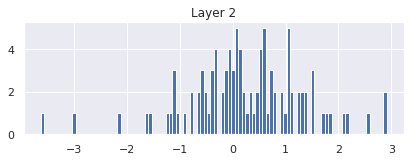

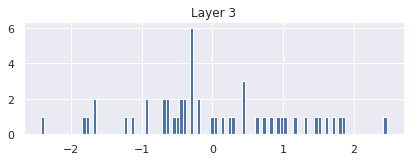

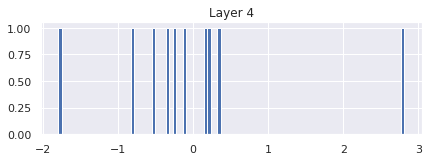

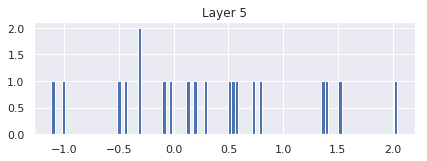

In [41]:
weights_after_unit_pruning()